<a href="https://colab.research.google.com/github/cra2003/TCSINternship/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sahi
!pip install ultralytics

from ultralytics import YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

In [ ]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov8_model_path = "/content/drive/MyDrive/Archive/runs/detect/train/weights/best.pt"
download_yolov8s_model(yolov8_model_path)


In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.6,
    device="cpu", # or 'cuda:0'
)

In [ ]:
result = get_prediction('/content/3.jpeg', detection_model)

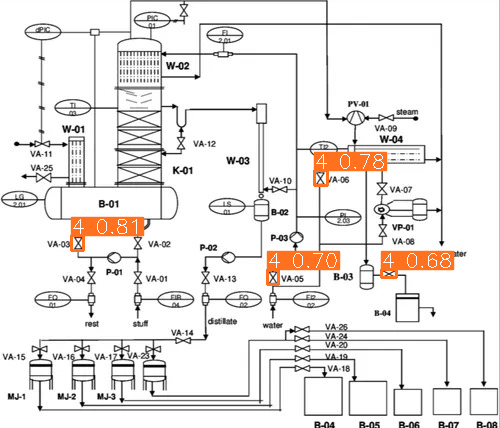

In [ ]:

result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
result = get_sliced_prediction(
    image,
    detection_model,
    slice_height = 250,
    slice_width = 200,
    overlap_height_ratio = 0.1,
    overlap_width_ratio = 0.5,
)

Performing prediction on 4 number of slices.


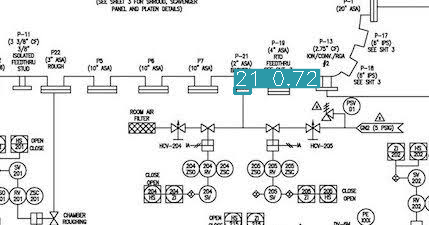

In [ ]:
result.export_visuals(export_dir="demo_data/",hide_labels=False)

Image("demo_data/prediction_visual.png")

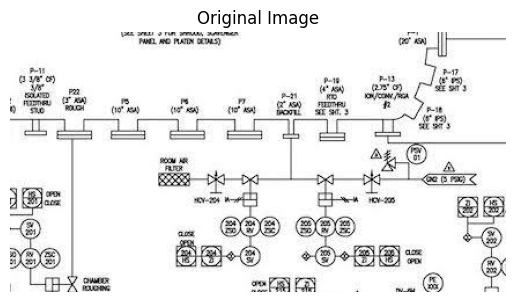

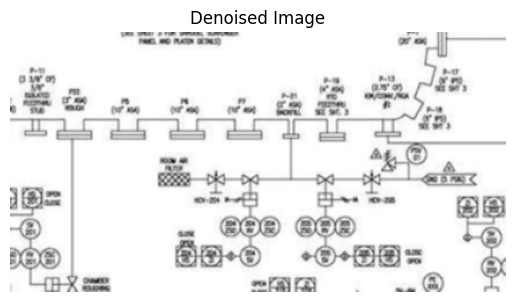

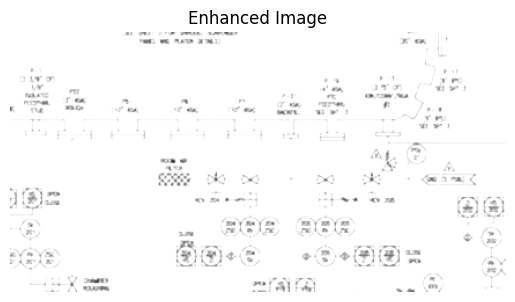

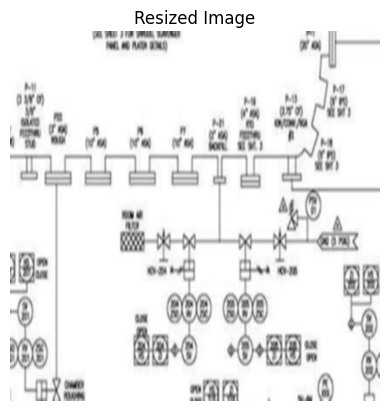

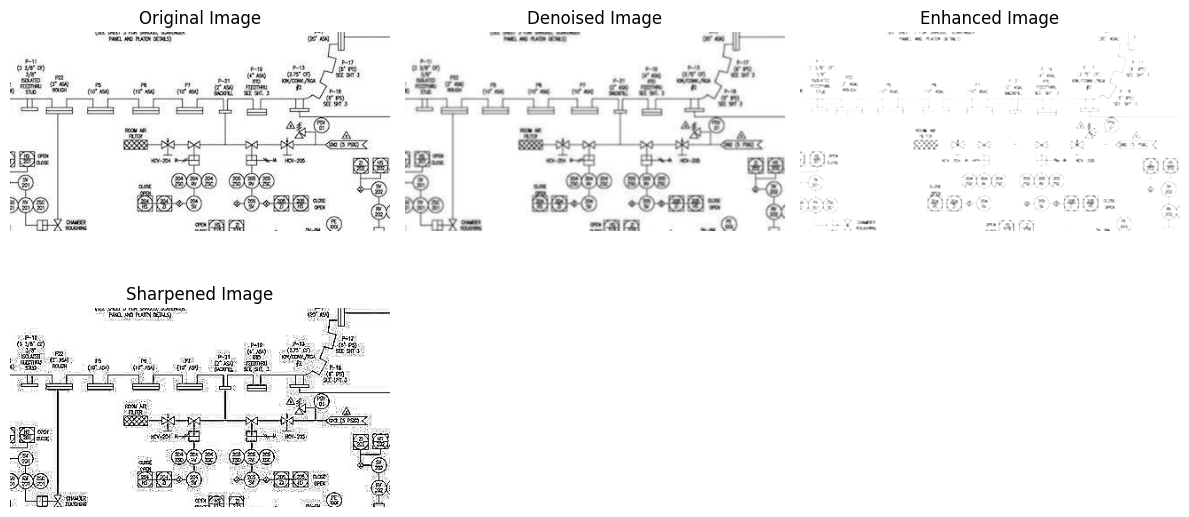

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/1.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


denoised_image = cv2.GaussianBlur(image, (3,3), -10)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.axis('off')
plt.show()

enhanced_image = cv2.convertScaleAbs(denoised_image, alpha=1.5, beta=0)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.show()

kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, kernel)


new_width = 1500
new_height = 1500
resized_image = cv2.resize(denoised_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')
plt.subplot(232), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)), plt.title('Denoised Image')
plt.axis('off')
plt.subplot(233), plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)), plt.title('Enhanced Image')
plt.axis('off')
plt.subplot(234), plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)), plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()